# El objetivo de este cuaderno es mostrar un resumen de los scripts


Vamos a comenzar visualizando los distintos ficheros de datos que tenemos en la carpeta `datos`, que meteremos en la lista **archivos**. Además vamos a importar el script `funciones.py` para poder utilizar todas las funciones de ese script.

In [2]:
from funcionesdef import*
import os 


carpeta_datos = 'datos'
archivos = [os.path.join(carpeta_datos, archivo) for archivo in os.listdir(carpeta_datos) if os.path.isfile(os.path.join(carpeta_datos,archivo))]
archivos.remove('datos/read.txt')
archivos

['datos/VIGO359A00.22O',
 'datos/BADJ122A00.22O',
 'datos/MAD1060A0030s.23O',
 'datos/MAD1047A00.23O',
 'datos/TERU042A00.23O',
 'datos/PENI168A00.22O',
 'datos/GRA1065Q00.23O',
 'datos/MAD1060R001s.23O']

En primer lugar, realizaremos un análisis gráfico de los datos relacionados con los satélites de un archivo específico con el objetivo de visualizar y comprender mejor la información. Este enfoque es ampliamente utilizado en la práctica para examinar y representar los datos satelitales de manera visual.

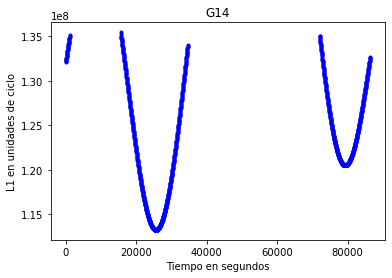

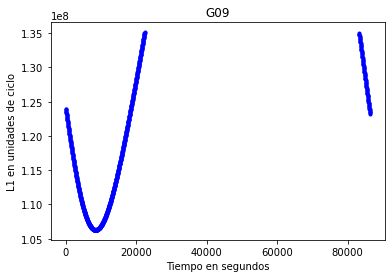

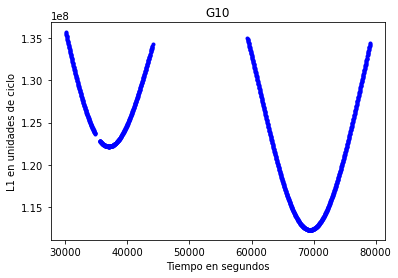

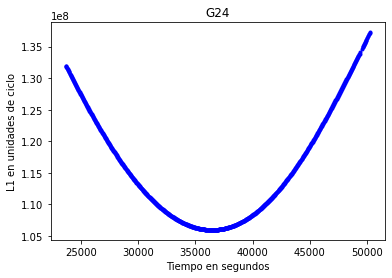

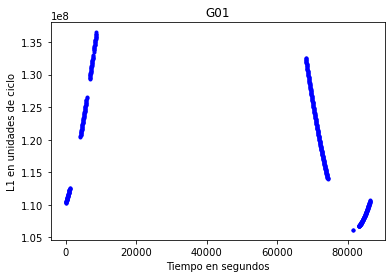

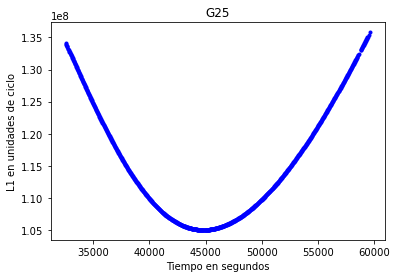

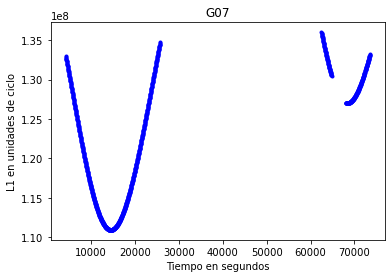

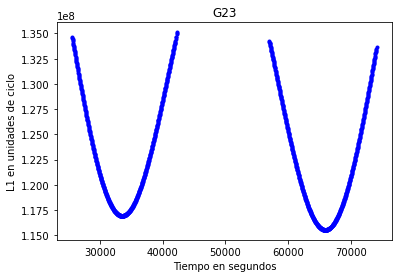

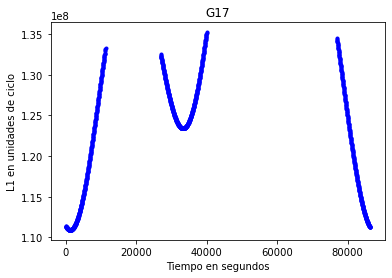

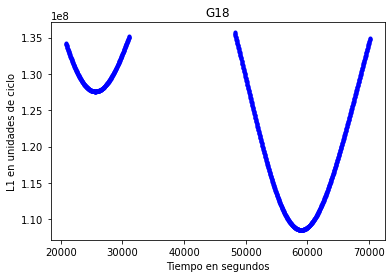

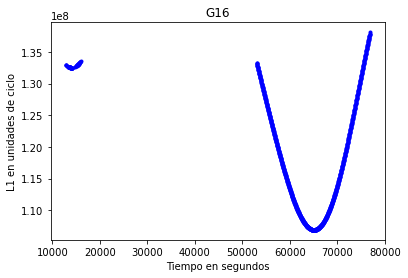

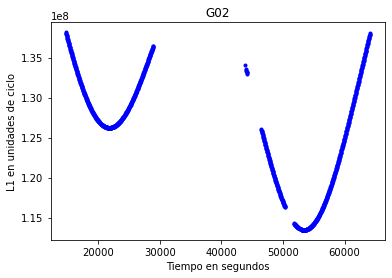

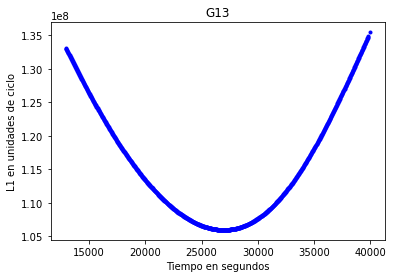

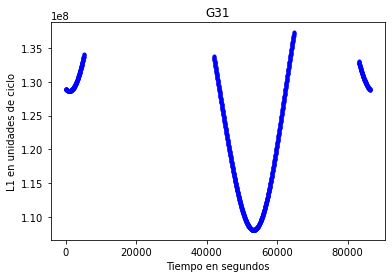

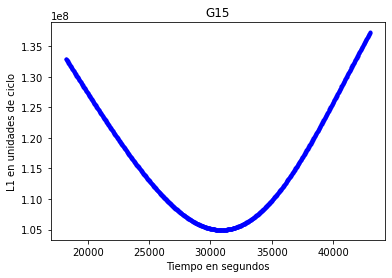

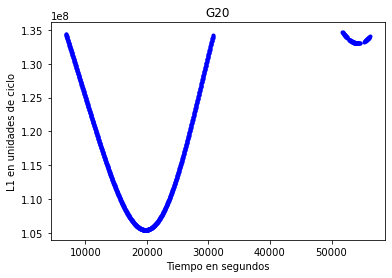

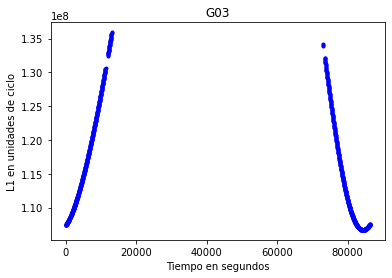

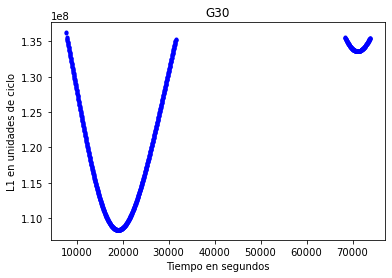

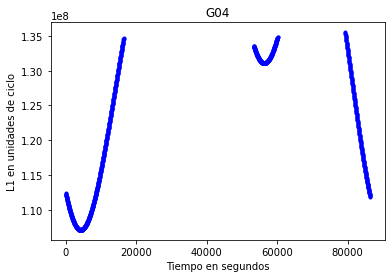

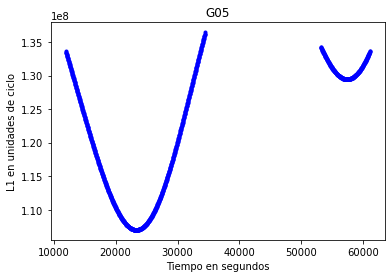

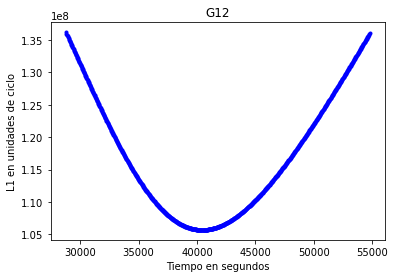

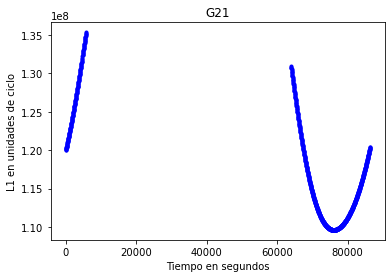

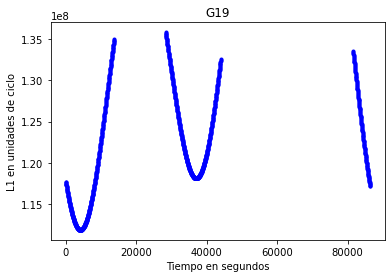

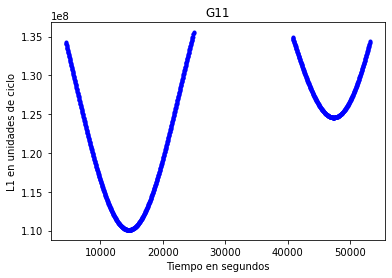

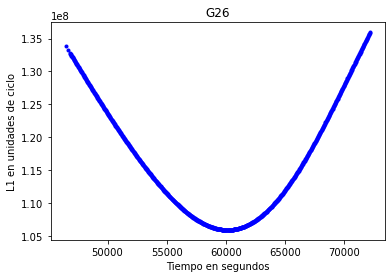

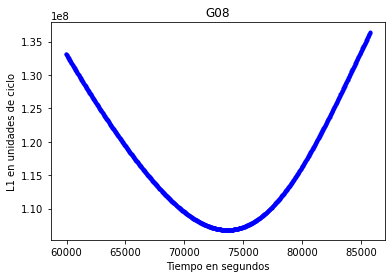

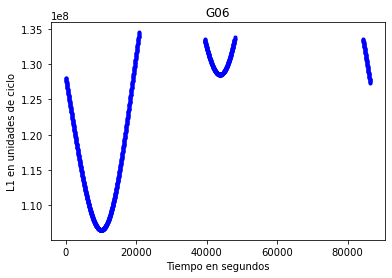

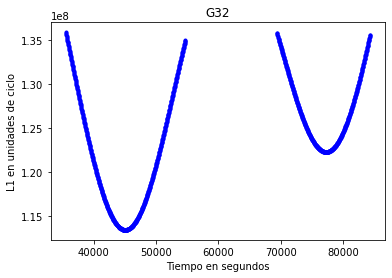

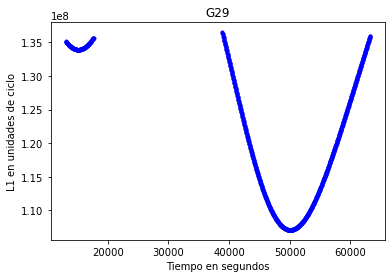

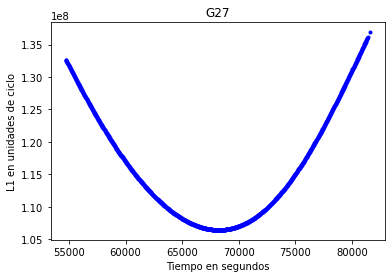

In [4]:
Madrid='datos/MAD1047A00.23O'
dict_Granada = all_information2(Madrid)
graficar_frec(Madrid,3,30)

#### Método basado en la estimación polinomial

* Método1: calcula los residuos de los polinomios divididos de 10 en 10 y establecer un umbral fijo para todos los datos en relación a los residuos.

* Método2: utiliza un polinomio para cada 10 valores y establece el umbral en relación a este.

Aquí presentaremos solo el método1 ya que es análogo en ejecución de script al primer método
Ambos métodos tienen 4 variables:

1. datos, donde tenemos que insertar los datos sobre la frecuencia o combinación de frecuencias.
2. Numero de muestras a tomar por polinomio. 
3. Multiplo, que será las veces por las que multiplicaremos el umbral( múltiplo de la desviación típica de los residuos)
4. tiempo, que es o bien 1 que significa observación cada segundo o bien 30

In [5]:
#Datos a utilizar

sat = 'G10'
l1 = L1(Madrid, sat)
l2 = L2(Madrid, sat)

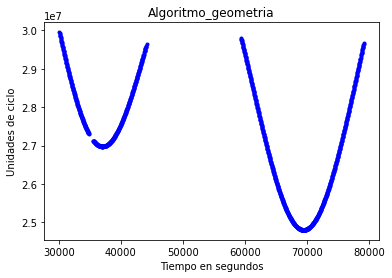

Instantes en los que se han detectado saltos de ciclo [34590, 37860, 37890, 43650, 43680, 43770, 44010, 59850, 59940, 59970, 60000, 60030, 78570, 78600, 78660, 78690]


/home/david/Escritorio/TFG/algoritmos/combinacion_libre_geo.py:19: RankWarning: Polyfit may be poorly conditioned
  media,std = selector_umbral(datos,numero_muestras)#calculamos la media por si fuera necesaria en el umbral
/home/david/Escritorio/TFG/algoritmos/combinacion_libre_geo.py:22: RankWarning: Polyfit may be poorly conditioned
  resultados = alg_sacar_saltos(datos,numero_muestras,umbral)


In [6]:
from combinacion_libre_geo import algoritmo as algoritmo_geo

N = 10
multiplo = 3
datos = f1menosf2(l1,l2)
saltos_geo = algoritmo_geo(datos,N,3,30)

print(f"Instantes en los que se han detectado saltos de ciclo {saltos_geo}")




Para `combinacion_libre_geo2` es análogo el proceso

### Combinación libre de ionosfera
Realizaremos un proceso análogo al anterior a difrencia de que los datos serán la combinación libre de ionosfera

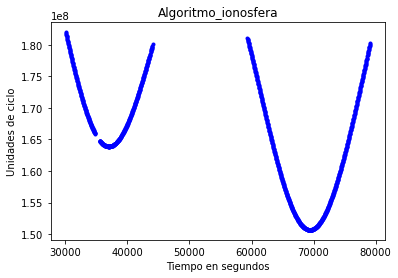

Instantes en los que se han detectado saltos de ciclo [34590, 43650, 43680, 44010, 59970, 60000]


/home/david/Escritorio/TFG/algoritmos/combinacion_libre_io.py:20: RankWarning: Polyfit may be poorly conditioned
  media,std = selector_umbral(datos,numero_muestras) #Calculamos la media por si la quisieramos introducir en el umbral
/home/david/Escritorio/TFG/algoritmos/combinacion_libre_io.py:22: RankWarning: Polyfit may be poorly conditioned
  resultados = alg_sacar_saltos(datos,numero_muestras,umbral*multiplo)


In [7]:
from combinacion_libre_io import algoritmo as algoritmo_io
N = 10
multiplo = 3
datos = combinacion_libre_ios(l1, l2)
saltos_io = algoritmo_io(datos,N,multiplo,30)
print(f"Instantes en los que se han detectado saltos de ciclo {saltos_io}")


### Comparación de saltos de la combinación libre de geometría e ionosfera
Observación: el algoritmo que se encuentra en `combinacion_geo_iono.py` realiza un proceso análogo a esto que realizaré a continuación

In [8]:
print(f"Saltos de ciclo detectados con la combinación libre de geometría son: \n{saltos_geo}\n Saltos de ciclo detectados con la combinación libre de ionosfera son: \n{saltos_io}\n")
saltos_comunes = list(set(saltos_geo) & set(saltos_io))
saltos_nocomunes = list(set(saltos_geo) ^ set(saltos_io))
print(f"\nLos  saltos de comunes a ambas combinaciones son {saltos_comunes}\n")
print(f"\nLos  saltos no comunes a ambas combinaciones son {saltos_nocomunes}")


Saltos de ciclo detectados con la combinación libre de geometría son: 
[34590, 37860, 37890, 43650, 43680, 43770, 44010, 59850, 59940, 59970, 60000, 60030, 78570, 78600, 78660, 78690]
 Saltos de ciclo detectados con la combinación libre de ionosfera son: 
[34590, 43650, 43680, 44010, 59970, 60000]


Los  saltos de comunes a ambas combinaciones son [43680, 60000, 43650, 59970, 44010, 34590]


Los  saltos no comunes a ambas combinaciones son [78690, 37890, 37860, 59940, 78660, 78600, 59850, 60030, 78570, 43770]


**Ahora podríamos realizar un estudio sobre esos valores para ver que sucede con esos valores**

### Algoritmo basado en clustering
La idea es analizar los saltos de ciclo en función de los clústers

En este algoritmo incluimos las siguientes variables:
1. Datos 
2. Número de muestras a tomar 
3. Tiempo

Observación: el umbral lo elige el algoritmo en función del coeficiente de Silhouette

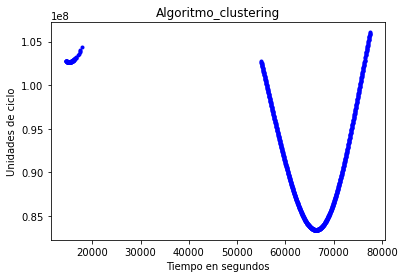

RANGO entre 0 1050
{0, -1}


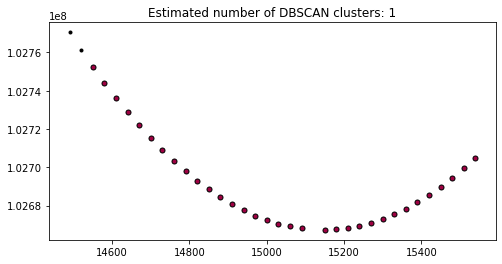

RANGO entre 1050 2100
SALTO DE CICLO
RANGO entre 2100 3150
{0, -1}


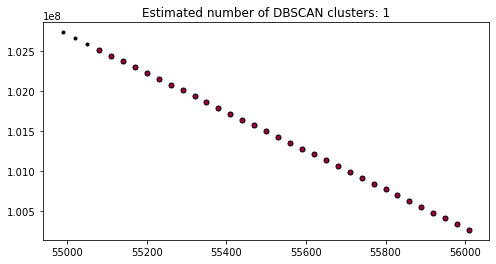

RANGO entre 3150 4200
{0, -1}


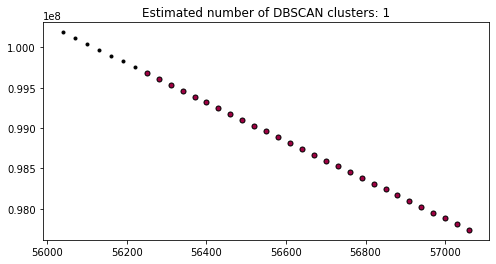

RANGO entre 4200 5250
{0, -1}


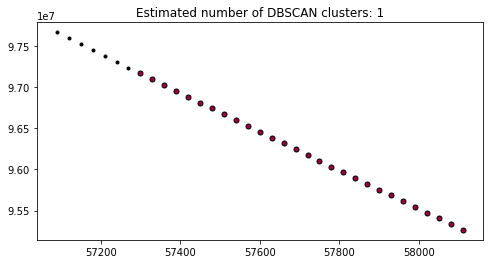

RANGO entre 5250 6300
{0, -1}


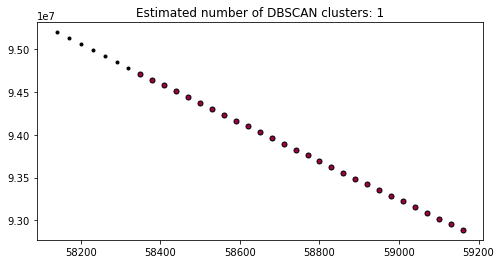

RANGO entre 6300 7350
{0, -1}


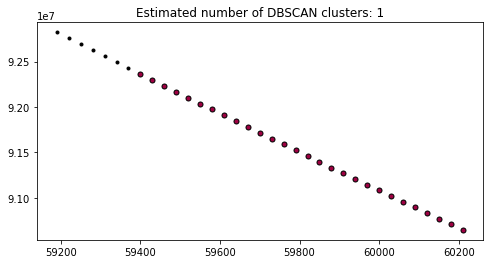

RANGO entre 7350 8400
{0, -1}


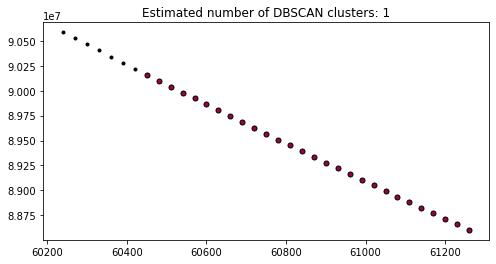

RANGO entre 8400 9450
{0, -1}


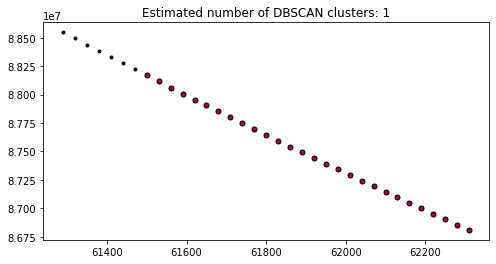

RANGO entre 9450 10500
{0, -1}


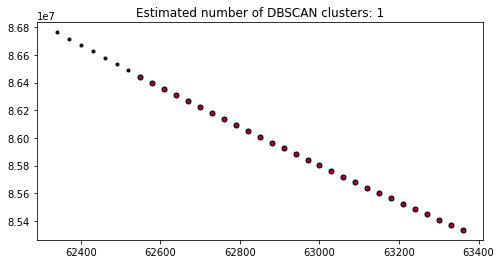

RANGO entre 10500 11550
{0, -1}


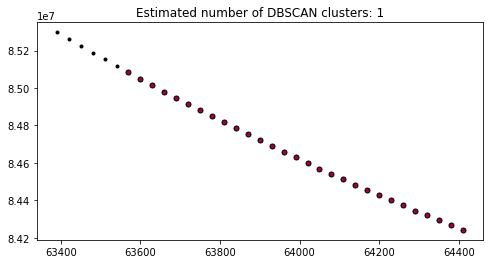

RANGO entre 11550 12600
{0, -1}


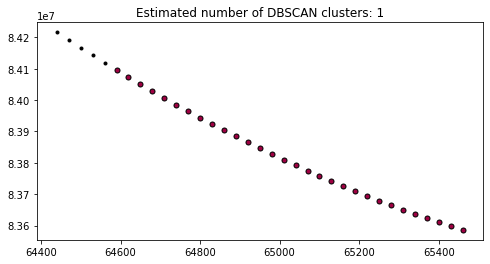

RANGO entre 12600 13650
{0, -1}


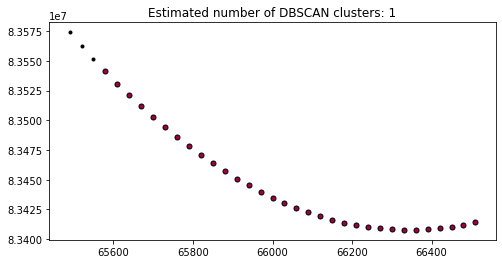

RANGO entre 13650 14700
{0, -1}


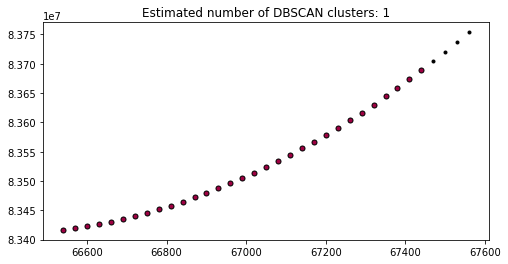

RANGO entre 14700 15750
{0, -1}


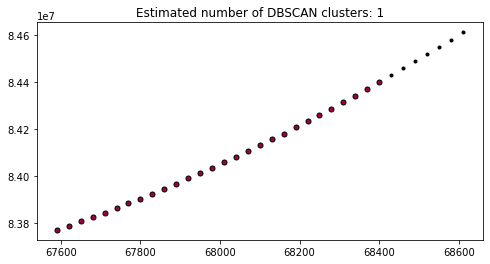

RANGO entre 15750 16800
{0, -1}


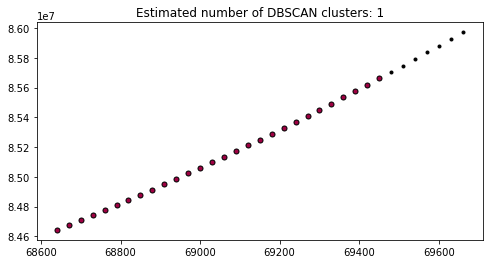

RANGO entre 16800 17850
{0, -1}


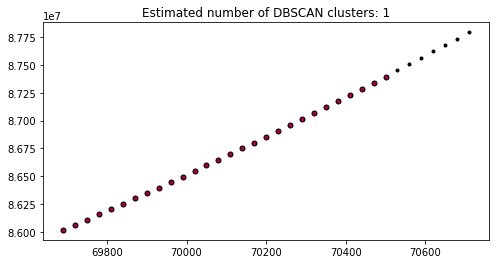

RANGO entre 17850 18900
{0, -1}


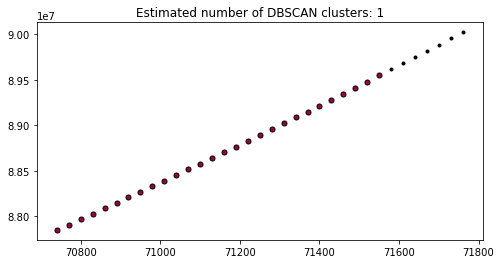

RANGO entre 18900 19950
{0, -1}


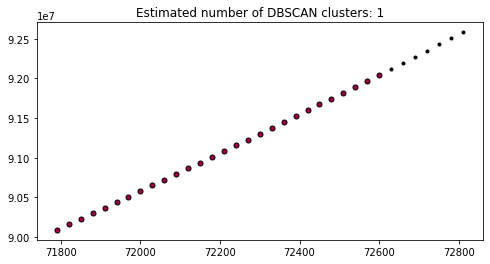

RANGO entre 19950 21000
{0, -1}


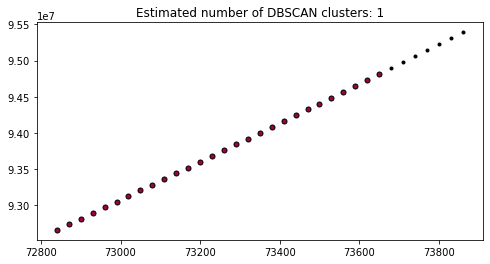

RANGO entre 21000 22050
{0, -1}


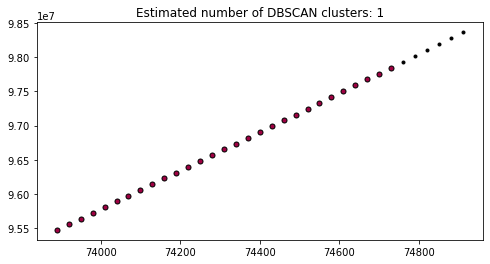

RANGO entre 22050 23100
{0}
RANGO entre 23100 24150
SALTO DE CICLO
RANGO entre 24150 25200
{0, -1}


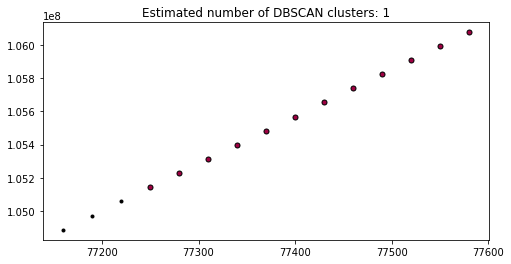

In [9]:
from clustering import algoritmo as algoritmo_clustering

Teruel = "datos//TERU042A00.23O"
sat = 'G16'
N = 35
datos = L2(Teruel,sat)
algoritmo_clustering(datos,N)

### Algoritmo basado en regresión lineal

Este método tiene 3 variables:

1. datos, donde tenemos que insertar los datos sobre la frecuencia o combinación de frecuencias.
2. Numero de muestras a tomar por el algoritmo. 
3. El umbral es la media + 2 veces la desviación típica
4. tiempo


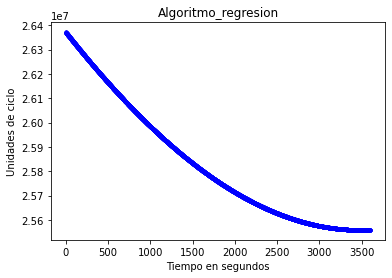

[161, 171, 201, 260, 311, 340, 361, 2171]

In [10]:
from regresion2 import algoritmo as alg_reg
Granada = 'datos/GRA1065Q00.23O'
sat = 'G23' 
l1 = L1(Granada , sat)
l2 = L2(Granada, sat)
datos = f1menosf2(l1,l2)
paso = 10
saltos = alg_reg(datos,paso,1)
saltos 

Ahora vamos a verificar esos saltos con un contraste de hipótesis

1. datos
2. paso
3. lista_saltos

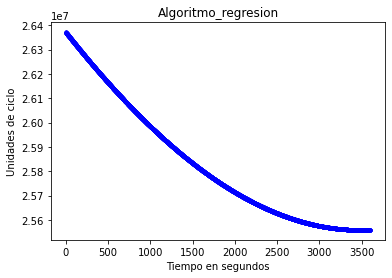

[False, True, True, True, True, True, False, False]

In [11]:
from contraste2 import comprobacion 
comprobacion(datos,20,saltos)

### Algoritmo basado en filtro promedio con umbral relacionado con MAD y desviación típica

Este método tiene 4 variables 

1. seleccion, si es 0 toma un umbral relacionado con MAD y 1 para desviación típica
2. datos
3. window_size
4. multiplo
5. tiempo 

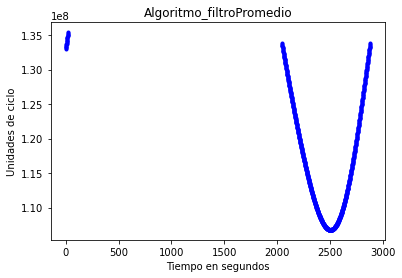

[10, 21, 2054, 2074, 2085, 2487, 2498, 2509, 2520, 2531, 2542, 2553, 2564]

In [12]:
from filtropromedio import algoritmo as al_fil
Teruel = "datos/TERU042A00.23O"
sat = 'G08'
seleccion = 0
datos = L1(Teruel, sat)
window_size = 10
multiplo = 2
tiempo = 1
al_fil(seleccion, datos, window_size, multiplo, tiempo)

**Hacemos lo mismo para seleccion = 1**

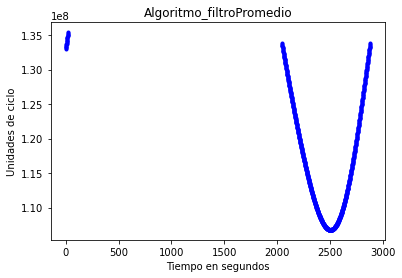

[11, 22, 2495, 2506, 2517]

In [13]:
from filtropromedio import algoritmo as al_fil
Teruel = "datos/TERU042A00.23O"
sat = 'G08'
seleccion = 1
datos = L1(Teruel, sat)
window_size = 10
multiplo = 2
tiempo = 1
al_fil(seleccion, datos, window_size, multiplo, tiempo)